# 预测体模量

# 数据处理

In [1]:
from matminer.datasets import load_dataset
Data = load_dataset('elastic_tensor_2015', data_home = '.')
Data

,material_id,formula,nsites,space_group,volume,structure,elastic_anisotropy,G_Reuss,G_VRH,G_Voigt,K_Reuss,K_VRH,K_Voigt,poisson_ratio,compliance_tensor,elastic_tensor,elastic_tensor_original,cif,kpoint_density,poscar
0,mp-10003,Nb4CoSi,12,124,194.419802,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",0.030688,96.844535,97.141604,97.438674,194.267623,194.268884,194.270146,0.285701,"[[0.004385293093993, -0.0016070693558990002, -...","[[311.33514638650246, 144.45092552856926, 126....","[[311.33514638650246, 144.45092552856926, 126....",#\#CIF1.1\n###################################...,7000,Nb8 Co2 Si2\n1.0\n6.221780 0.000000 0.000000\n...
1,mp-10010,Al(CoSi)2,5,164,61.987320,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",0.266910,93.939650,96.252006,98.564362,173.647763,175.449907,177.252050,0.268105,"[[0.0037715428949660003, -0.000844229828709, -...","[[306.93357350984974, 88.02634955100905, 105.6...","[[306.93357350984974, 88.02634955100905, 105.6...",#\#CIF1.1\n###################################...,7000,Al1 Co2 Si2\n1.0\n3.932782 0.000000 0.000000\n...
2,mp-10015,SiOs,2,221,25.952539,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",0.756489,120.962289,130.112955,139.263621,295.077545,295.077545,295.077545,0.307780,"[[0.0019959391925840004, -0.000433146670736000...","[[569.5291276937579, 157.8517489654999, 157.85...","[[569.5291276937579, 157.8517489654999, 157.85...",#\#CIF1.1\n###################################...,7000,Si1 Os1\n1.0\n2.960692 0.000000 0.000000\n0.00...
3,mp-10021,Ga,4,63,76.721433,"[[0. 1.09045794 0.84078375] Ga, [0. ...",2.376805,12.205989,15.101901,17.997812,49.025963,49.130670,49.235377,0.360593,"[[0.021647143908635, -0.005207263618160001, -0...","[[69.28798774976904, 34.7875015216915, 37.3877...","[[70.13259066665267, 40.60474945058445, 37.387...",#\#CIF1.1\n###################################...,7000,Ga4\n1.0\n2.803229 0.000000 0.000000\n0.000000...
4,mp-10025,SiRu2,12,62,160.300999,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",0.196930,100.110773,101.947798,103.784823,255.055257,256.768081,258.480904,0.324682,"[[0.00410214297725, -0.001272204332729, -0.001...","[[349.3767766177825, 186.67131003104407, 176.4...","[[407.4791016459293, 176.4759188081947, 213.83...",#\#CIF1.1\n###################################...,7000,Si4 Ru8\n1.0\n4.037706 0.000000 0.000000\n0.00...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,mp-9961,Ti2CdC,8,194,121.520152,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",2.229538,43.697362,53.329789,62.962216,110.397752,111.788114,113.178476,0.294196,"[[0.0044568832753350005, -0.001136458158149, -...","[[250.07723993082595, 71.61036453717465, 44.31...","[[250.07723993082595, 71.61036453717465, 44.31...",#\#CIF1.1\n###################################...,7000,Ti4 Cd2 C2\n1.0\n3.103427 0.000000 0.000000\n-...
1177,mp-9969,ScSi,8,63,145.392095,"[[0. 8.53417539 0.91740975] Sc, [0. ...",0.635889,66.067578,70.253182,74.438787,101.207608,101.326807,101.446005,0.218412,"[[0.007188192080993001, -0.000983458215036, -0...","[[172.01931871370775, 43.38593006033102, 76.22...","[[172.01931871370775, 43.38593006033102, 76.22...",#\#CIF1.1\n###################################...,7000,Sc4 Si4\n1.0\n3.996960 0.000000 0.000000\n0.00...
1178,mp-9972,YSi,8,63,174.123748,"[[0. 9.084549 0.960921] Y, [0. 1.4...",0.454691,62.326766,65.160458,67.994149,89.416354,89.418161,89.419968,0.206850,"[[0.007749056578454001, -0.001293580144074, -0...","[[159.44792354820547, 42.19645554837514, 66.58...","[[159.44792354820547, 42.19645554837514, 66.58...",#\#CIF1.1\n###################################...,7000,Y4 Si4\n1.0\n4.286685 0.000000 0.000000\n0.000...
1179,mp-998,Al2Cu,12,140,179.147816,"[[5.11035838 2.07486738 0. ] Al, [3.996...",0.735449,37.457129,40.211802,42.966475,99.383115,99.384565,99.386015,0.321738,"[[0.007456839159427001, -0.002592061077082, -0...","[[170.12510286354689, 70.6116049091726, 57.026...","[[170.12510286354689, 70.6116049091726, 57.026.

In [2]:
Data = Data[['formula', 'structure', 'K_VRH', 'space_group', 'elastic_anisotropy']]
Data

,formula,structure,K_VRH,space_group,elastic_anisotropy
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,124,0.030688
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,164,0.266910
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,221,0.756489
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,63,2.376805
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,62,0.196930
...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,194,2.229538
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,63,0.635889
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,63,0.454691
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,140,0.735449


In [3]:
Data.loc[:,['formula', 'K_VRH']].head()

,formula,K_VRH
0,Nb4CoSi,194.268884
1,Al(CoSi)2,175.449907
2,SiOs,295.077545
3,Ga,49.130670
4,SiRu2,256.768081


# 特征提取

In [4]:
from matminer.featurizers.conversions import StrToComposition
Data = StrToComposition().featurize_dataframe(Data, col_id="formula")
Data

StrToComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,space_group,elastic_anisotropy,composition
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,124,0.030688,"(Nb, Co, Si)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,164,0.266910,"(Al, Co, Si)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,221,0.756489,"(Si, Os)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,63,2.376805,(Ga)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,62,0.196930,"(Si, Ru)"
...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,194,2.229538,"(Ti, Cd, C)"
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,63,0.635889,"(Sc, Si)"
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,63,0.454691,"(Y, Si)"
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,140,0.735449,"(Al, Cu)"


In [5]:
from matminer.featurizers.composition import ElementProperty
ep = ElementProperty.from_preset(preset_name="magpie")
Data = ep.featurize_dataframe(Data, col_id="composition") 
Data

ElementProperty:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,space_group,elastic_anisotropy,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,124,0.030688,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,...,1.548471,0.258079,0.430131,0.000000,194.0,229.0,35.0,222.833333,9.611111,229.0
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,164,0.266910,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,...,1.548471,0.619388,0.743266,0.000000,194.0,227.0,33.0,213.400000,15.520000,194.0
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,221,0.756489,"(Si, Os)",14.0,76.0,62.0,45.000000,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,63,2.376805,(Ga),31.0,31.0,0.0,31.000000,...,0.000000,0.000000,0.000000,0.000000,64.0,64.0,0.0,64.000000,0.000000,64.0
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,62,0.196930,"(Si, Ru)",14.0,44.0,30.0,34.000000,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,205.000000,14.666667,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,194,2.229538,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,...,0.000023,0.000011,0.000011,0.000023,194.0,194.0,0.0,194.000000,0.000000,194.0
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,63,0.635889,"(Sc, Si)",14.0,21.0,7.0,17.500000,...,0.000006,0.000003,0.000003,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,63,0.454691,"(Y, Si)",14.0,39.0,25.0,26.500000,...,0.000000,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,140,0.735449,"(Al, Cu)",13.0,29.0,16.0,18.333333,...,0.000000,0.000000,0.000000,0.000000,225.0,225.0,0.0,225.000000,0.000000,225.0


In [6]:
from matminer.featurizers.conversions import CompositionToOxidComposition
Data = CompositionToOxidComposition().featurize_dataframe(Data, "composition")
Data

CompositionToOxidComposition:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,space_group,elastic_anisotropy,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,124,0.030688,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,...,0.258079,0.430131,0.000000,194.0,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)"
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,164,0.266910,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,...,0.619388,0.743266,0.000000,194.0,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)"
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,221,0.756489,"(Si, Os)",14.0,76.0,62.0,45.000000,...,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)"
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,63,2.376805,(Ga),31.0,31.0,0.0,31.000000,...,0.000000,0.000000,0.000000,64.0,64.0,0.0,64.000000,0.000000,64.0,(Ga0+)
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,62,0.196930,"(Si, Ru)",14.0,44.0,30.0,34.000000,...,0.000000,0.000000,0.000000,194.0,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,194,2.229538,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,...,0.000011,0.000011,0.000023,194.0,194.0,0.0,194.000000,0.000000,194.0,"(Ti0+, Cd0+, C0+)"
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,63,0.635889,"(Sc, Si)",14.0,21.0,7.0,17.500000,...,0.000003,0.000003,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Sc0+, Si0+)"
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,63,0.454691,"(Y, Si)",14.0,39.0,25.0,26.500000,...,0.000000,0.000000,0.000000,194.0,227.0,33.0,210.500000,16.500000,194.0,"(Y0+, Si0+)"
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,140,0.735449,"(Al, Cu)",13.0,29.0,16.0,18.333333,...,0.000000,0.000000,0.000000,225.0,225.0,0.0,225.000000,0.000000,225.0,"(Al0+, Cu0+)"


In [7]:
from matminer.featurizers.composition import OxidationStates
os = OxidationStates()
Data = os.featurize_dataframe(Data, "composition_oxid")
Data

OxidationStates:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,space_group,elastic_anisotropy,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,124,0.030688,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,...,229.0,35.0,222.833333,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,164,0.266910,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,...,227.0,33.0,213.400000,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,221,0.756489,"(Si, Os)",14.0,76.0,62.0,45.000000,...,227.0,33.0,210.500000,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,63,2.376805,(Ga),31.0,31.0,0.0,31.000000,...,64.0,0.0,64.000000,0.000000,64.0,(Ga0+),0,0,0,0.000000
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,62,0.196930,"(Si, Ru)",14.0,44.0,30.0,34.000000,...,227.0,33.0,205.000000,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,194,2.229538,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,...,194.0,0.0,194.000000,0.000000,194.0,"(Ti0+, Cd0+, C0+)",0,0,0,0.000000
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,63,0.635889,"(Sc, Si)",14.0,21.0,7.0,17.500000,...,227.0,33.0,210.500000,16.500000,194.0,"(Sc0+, Si0+)",0,0,0,0.000000
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,63,0.454691,"(Y, Si)",14.0,39.0,25.0,26.500000,...,227.0,33.0,210.500000,16.500000,194.0,"(Y0+, Si0+)",0,0,0,0.000000
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,140,0.735449,"(Al, Cu)",13.0,29.0,16.0,18.333333,...,225.0,0.0,225.000000,0.000000,225.0,"(Al0+, Cu0+)",0,0,0,0.000000


In [8]:
from matminer.featurizers.structure import DensityFeatures
df = DensityFeatures()
Data= df.featurize_dataframe(Data, "structure")
Data

DensityFeatures:   0%|          | 0/1181 [00:00<?, ?it/s]

,formula,structure,K_VRH,space_group,elastic_anisotropy,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,Nb4CoSi,"[[0.94814328 2.07280467 2.5112 ] Nb, [5.273...",194.268884,124,0.030688,"(Nb, Co, Si)",14.0,41.0,27.0,34.166667,...,9.611111,229.0,"(Nb0+, Co0+, Si0+)",0,0,0,0.000000,7.834556,16.201654,0.688834
1,Al(CoSi)2,"[[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...",175.449907,164,0.266910,"(Al, Co, Si)",13.0,27.0,14.0,19.000000,...,15.520000,194.0,"(Al3+, Co2+, Co3+, Si4-)",-4,3,7,3.872983,5.384968,12.397466,0.644386
2,SiOs,"[[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]",295.077545,221,0.756489,"(Si, Os)",14.0,76.0,62.0,45.000000,...,16.500000,194.0,"(Si4-, Os4+)",-4,4,8,5.656854,13.968635,12.976265,0.569426
3,Ga,"[[0. 1.09045794 0.84078375] Ga, [0. ...",49.130670,63,2.376805,(Ga),31.0,31.0,0.0,31.000000,...,0.000000,64.0,(Ga0+),0,0,0,0.000000,6.036267,19.180359,0.479802
4,SiRu2,"[[1.0094265 4.24771709 2.9955487 ] Si, [3.028...",256.768081,62,0.196930,"(Si, Ru)",14.0,44.0,30.0,34.000000,...,14.666667,194.0,"(Si4-, Ru2+)",-4,2,6,4.242641,9.539514,13.358418,0.598395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,Ti2CdC,"[[1.55171489 0.89588144 8.41159136] Ti, [-1.88...",111.788114,194,2.229538,"(Ti, Cd, C)",6.0,48.0,42.0,24.500000,...,0.000000,194.0,"(Ti0+, Cd0+, C0+)",0,0,0,0.000000,6.016734,15.190017,0.658712
1177,ScSi,"[[0. 8.53417539 0.91740975] Sc, [0. ...",101.326807,63,0.635889,"(Sc, Si)",14.0,21.0,7.0,17.500000,...,16.500000,194.0,"(Sc0+, Si0+)",0,0,0,0.000000,3.336856,18.174013,0.625414
1178,YSi,"[[0. 9.084549 0.960921] Y, [0. 1.4...",89.418161,63,0.454691,"(Y, Si)",14.0,39.0,25.0,26.500000,...,16.500000,194.0,"(Y0+, Si0+)",0,0,0,0.000000,4.462773,21.765469,0.689264
1179,Al2Cu,"[[5.11035838 2.07486738 0. ] Al, [3.996...",99.384565,140,0.735449,"(Al, Cu)",13.0,29.0,16.0,18.333333,...,0.000000,225.0,"(Al0+, Cu0+)",0,0,0,0.000000,4.356814,14.928982,0.595452


# 分割数据集

In [9]:
Y = Data['K_VRH'].values
exception = ["K_VRH", "elastic_anisotropy", "formula", "structure", "composition", "composition_oxid"]
X = Data.drop(exception, axis=1)

In [10]:
print("There are {} possible descriptors:\n\n{}".format(X.shape[1], X.columns.values))

There are 140 possible descriptors:

['space_group' 'MagpieData minimum Number' 'MagpieData maximum Number'
 'MagpieData range Number' 'MagpieData mean Number'
 'MagpieData avg_dev Number' 'MagpieData mode Number'
 'MagpieData minimum MendeleevNumber' 'MagpieData maximum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData avg_dev MendeleevNumber' 'MagpieData mode MendeleevNumber'
 'MagpieData minimum AtomicWeight' 'MagpieData maximum AtomicWeight'
 'MagpieData range AtomicWeight' 'MagpieData mean AtomicWeight'
 'MagpieData avg_dev AtomicWeight' 'MagpieData mode AtomicWeight'
 'MagpieData minimum MeltingT' 'MagpieData maximum MeltingT'
 'MagpieData range MeltingT' 'MagpieData mean MeltingT'
 'MagpieData avg_dev MeltingT' 'MagpieData mode MeltingT'
 'MagpieData minimum Column' 'MagpieData maximum Column'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData mode Column'
 'MagpieData minimum Row' 'Magpi

In [11]:
X.head()

,space_group,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
0,124,14.0,41.0,27.0,34.166667,9.111111,41.0,47.0,78.0,31.0,...,222.833333,9.611111,229.0,0,0,0,0.000000,7.834556,16.201654,0.688834
1,164,13.0,27.0,14.0,19.000000,6.400000,14.0,58.0,78.0,20.0,...,213.400000,15.520000,194.0,-4,3,7,3.872983,5.384968,12.397466,0.644386
2,221,14.0,76.0,62.0,45.000000,31.000000,14.0,57.0,78.0,21.0,...,210.500000,16.500000,194.0,-4,4,8,5.656854,13.968635,12.976265,0.569426
3,63,31.0,31.0,0.0,31.000000,0.000000,31.0,74.0,74.0,0.0,...,64.000000,0.000000,64.0,0,0,0,0.000000,6.036267,19.180359,0.479802
4,62,14.0,44.0,30.0,34.000000,13.333333,44.0,56.0,78.0,22.0,...,205.000000,14.666667,194.0,-4,2,6,4.242641,9.539514,13.358418,0.598395


# 线性回归

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

LR = LinearRegression()
LR.fit(X, Y)
print('Training Results:')
print('Training R2 = {}'.format(round(LR.score(X,Y), 3)))
print('Training RMSE = {}'.format(round(np.sqrt(mean_squared_error(y_true = Y, y_pred = LR.predict(X))),3)))
print('Training MAE = {}'.format(round(np.sqrt(mean_absolute_error(y_true = Y, y_pred = LR.predict(X))),3)))

Training Results:
Training R2 = 0.928
Training RMSE = 19.587
Training MAE = 3.65


In [13]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state=1)
MAE_LR = cross_val_score(LR, X, Y, scoring='neg_mean_absolute_error', cv=crossvalidation)
R2_LR = cross_val_score(LR, X, Y, scoring='r2', cv = crossvalidation)
RMSE_LR = cross_val_score(LR, X, Y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('CrossValidation Results:')
print('Folds: {}, mean R2: {}'.format(len(R2_LR), round(np.mean(R2_LR), 3)))
print('Folds: {}, mean RMSE: {}'.format(len(RMSE_LR), round(np.mean(np.abs(RMSE_LR)), 3)))
print('Folds: {}, mean MAE: {}'.format(len(RMSE_LR), round(np.mean(np.abs(MAE_LR)), 3)))

CrossValidation Results:
Folds: 10, mean R2: 0.903
Folds: 10, mean RMSE: 22.383
Folds: 10, mean MAE: 15.032


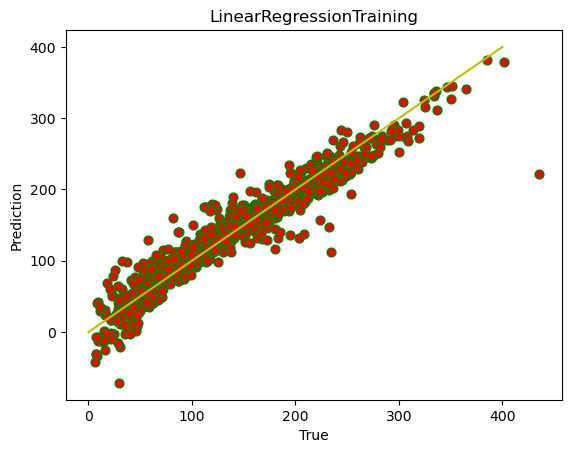

In [14]:
import matplotlib.pyplot as plt
plt.title('LinearRegressionTraining')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.plot([0,400], [0,400], 'y-')
plt.scatter(Y, LR.predict(X), s=40, c='r', edgecolor='g', linewidths=1)

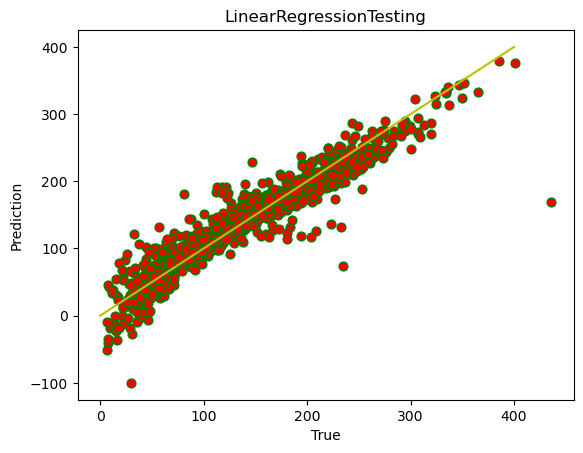

In [15]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
plt.title('LinearRegressionTesting')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.plot([0,400], [0,400], 'y-')
plt.scatter(Y, cross_val_predict(LR, X, Y, cv=crossvalidation), s=40, c='r', edgecolor='g', linewidths=1)

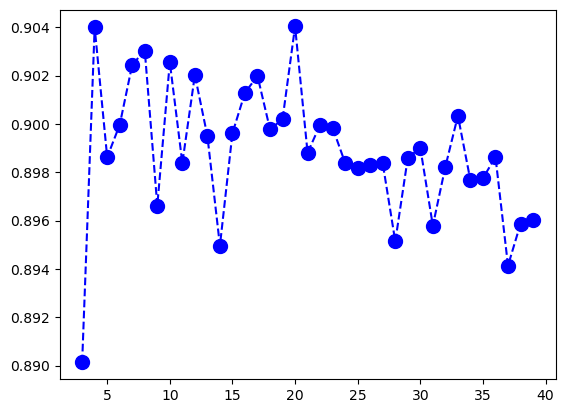

In [16]:
R2_LR_K = []
K = range(3, 40)
for j in K:
    crossvalidations = KFold(n_splits = j, shuffle = True, random_state=1)
    R2_LR_K.append(np.mean(cross_val_score(LR, X, Y, scoring='r2', cv = crossvalidations)))      
plt.plot(K, R2_LR_K, color='b', linestyle='dashed', marker='o', markerfacecolor='b', markersize=10)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200')])

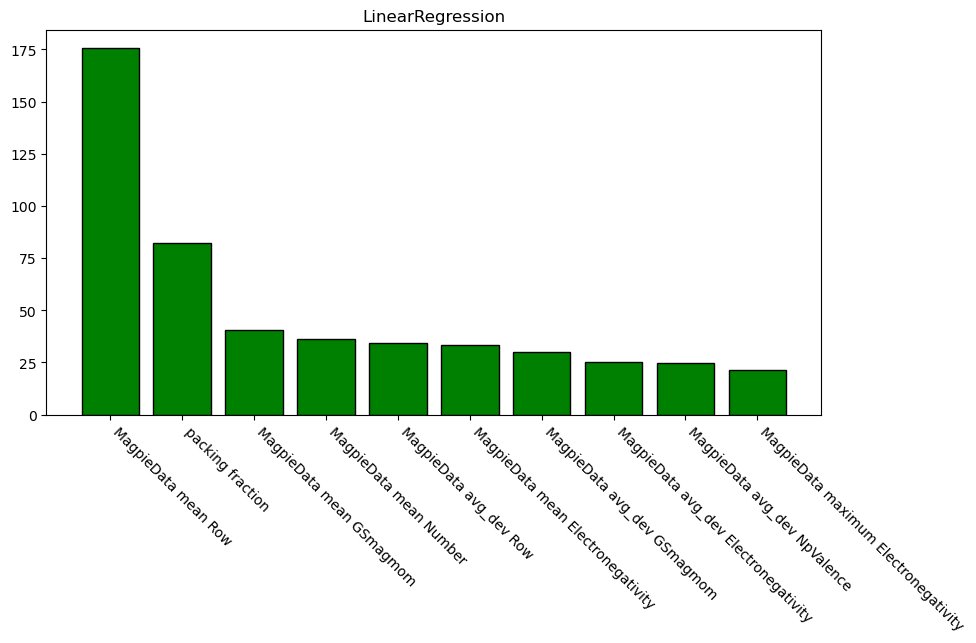

In [17]:
Feat_Name = X.columns.values
LR_Sort = np.argsort(np.abs(LR.coef_))[::-1]
plt.figure(figsize = (10,5))
plt.title('LinearRegression')
plt.bar(x = Feat_Name[LR_Sort][0:10], height = np.abs(LR.coef_[LR_Sort])[0:10], color = 'g', edgecolor = 'k')
plt.xticks(rotation = -45, fontsize = 10, ha = 'left')
plt.yticks(fontsize = 10)

# 决策树

In [18]:
from sklearn import tree
DTR = tree.DecisionTreeRegressor()
DTR.fit(X, Y)
print('Training Results:')
print('Training R2 = {}'.format(round(DTR.score(X,Y), 3)))
print('Training RMSE = {}'.format(round(np.sqrt(mean_squared_error(y_true = Y, y_pred = DTR.predict(X))),3)))
print('Training MAE = {}'.format(round(np.sqrt(mean_absolute_error(y_true = Y, y_pred = DTR.predict(X))),3)))

Training Results:
Training R2 = 1.0
Training RMSE = 0.0
Training MAE = 0.0


In [19]:
MAE_DTR = cross_val_score(DTR, X, Y, scoring='neg_mean_absolute_error', cv=crossvalidation)
R2_DTR = cross_val_score(DTR, X, Y, scoring='r2', cv = crossvalidation)
RMSE_DTR = cross_val_score(DTR, X, Y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('CrossValidation Results:')
print('Folds: {}, mean R2: {}'.format(len(R2_DTR), round(np.mean(R2_DTR),3)))
print('Folds: {}, mean RMSE: {}'.format(len(RMSE_DTR), round(np.mean(np.abs(RMSE_DTR)),3)))
print('Folds: {}, mean MAE: {}'.format(len(RMSE_LR), round(np.mean(np.abs(MAE_DTR)), 3)))

CrossValidation Results:
Folds: 10, mean R2: 0.876
Folds: 10, mean RMSE: 25.039
Folds: 10, mean MAE: 16.591


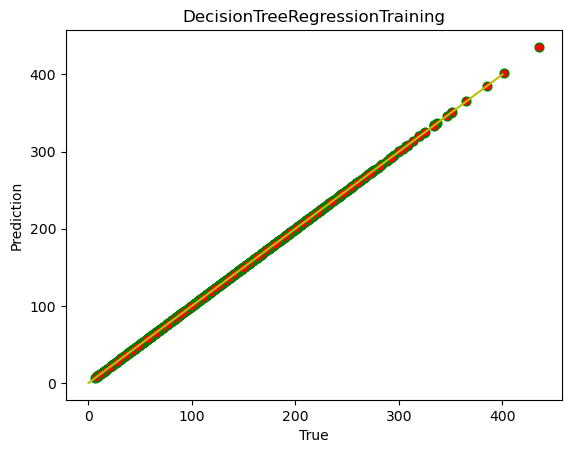

In [20]:
plt.title('DecisionTreeRegressionTraining')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.plot([0,400], [0,400], 'y-')
plt.scatter(Y, DTR.predict(X), s=40, c='r', edgecolor='g', linewidths=1)

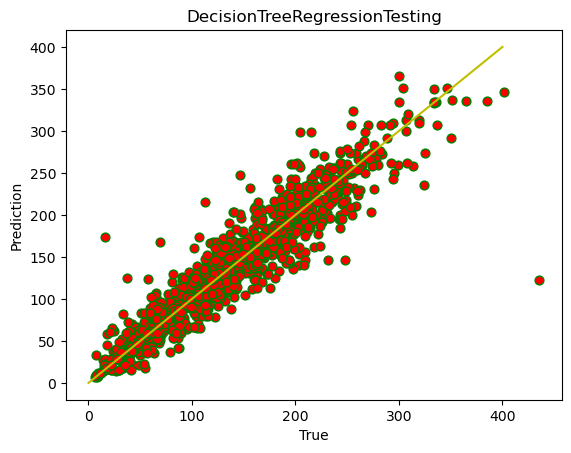

In [21]:
plt.title('DecisionTreeRegressionTesting')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.plot([0,400], [0,400], 'y-')
plt.scatter(Y, cross_val_predict(DTR, X, Y, cv=crossvalidation), s=40, c='r', edgecolor='g', linewidths=1)

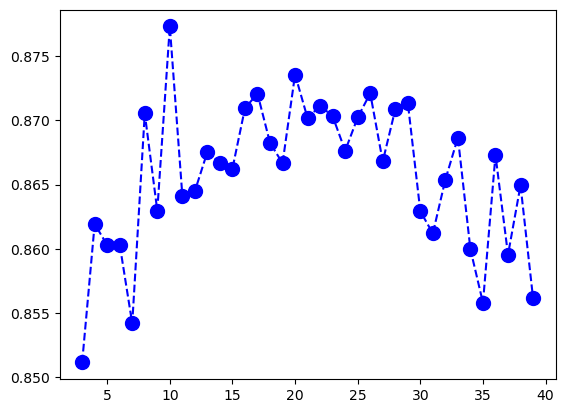

In [22]:
R2_DTR_K = []
K = range(3, 40)
for j in K:
    crossvalidations = KFold(n_splits = j, shuffle = True, random_state=1)
    R2_DTR_K.append(np.mean(cross_val_score(DTR, X, Y, scoring='r2', cv = crossvalidations)))      
plt.plot(K, R2_DTR_K, color='b', linestyle='dashed', marker='o', markerfacecolor='b', markersize=10)

In [23]:
importances_DTR = DTR.feature_importances_
DTR_Sort = np.argsort(importances_DTR)[::-1]

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

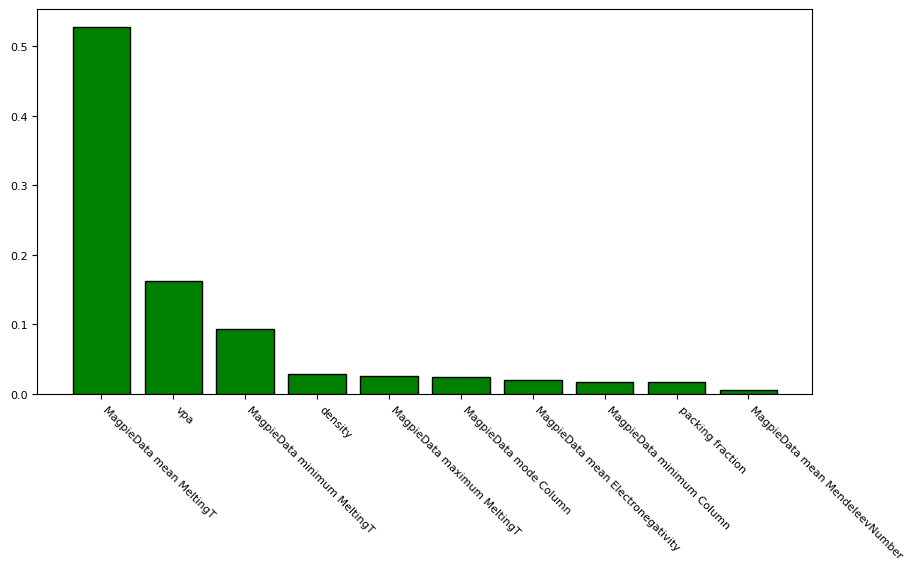

In [24]:
plt.figure(figsize = (10,5))
plt.bar(x = Feat_Name[DTR_Sort][0:10], height = importances_DTR[DTR_Sort][0:10], color = 'g', edgecolor = 'k')
plt.xticks(rotation = -45, fontsize = 8, ha = 'left')
plt.yticks(fontsize = 8)

# 随机森林

In [25]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=50, random_state=1)
RFR.fit(X, Y)
print('Training Results:')
print('Training R2 = {}'.format(round(RFR.score(X,Y), 3)))
print('Training RMSE = {}'.format(round(np.sqrt(mean_squared_error(y_true = Y, y_pred = RFR.predict(X))),3)))
print('Training MAE = {}'.format(round(np.sqrt(mean_absolute_error(y_true = Y, y_pred = RFR.predict(X))),3)))

Training Results:
Training R2 = 0.989
Training RMSE = 7.687
Training MAE = 2.081


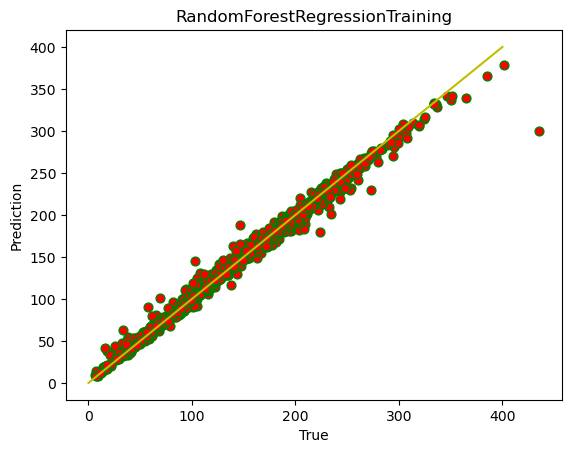

In [26]:
plt.title('RandomForestRegressionTraining')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.plot([0,400], [0,400], 'y-')
plt.scatter(Y, RFR.predict(X), s=40, c='r', edgecolor='g', linewidths=1)

In [27]:
MAE_RFR = cross_val_score(RFR, X, Y, scoring='neg_mean_absolute_error', cv=crossvalidation)
R2_RFR = cross_val_score(RFR, X, Y, scoring='r2', cv = crossvalidation)
RMSE_RFR = cross_val_score(RFR, X, Y, scoring='neg_root_mean_squared_error', cv=crossvalidation)
print('CrossValidation Results:')
print('Folds: {}, mean R2: {}'.format(len(R2_RFR), round(np.mean(R2_RFR),3)))
print('Folds: {}, mean RMSE: {}'.format(len(RMSE_RFR), round(np.mean(np.abs(RMSE_RFR)),3)))
print('Folds: {}, mean MAE: {}'.format(len(RMSE_LR), round(np.mean(np.abs(MAE_RFR)), 3)))

CrossValidation Results:
Folds: 10, mean R2: 0.924
Folds: 10, mean RMSE: 19.277
Folds: 10, mean MAE: 11.996


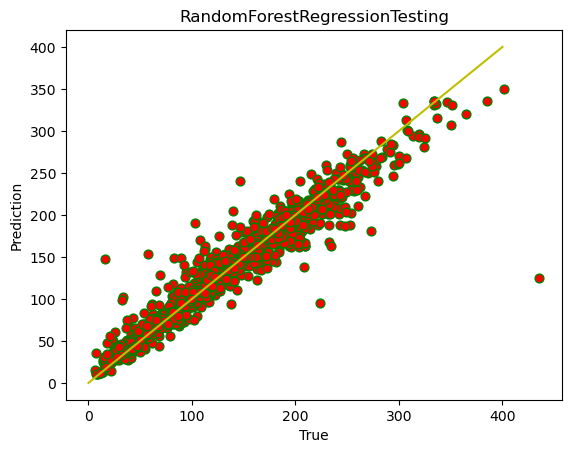

In [28]:
plt.title('RandomForestRegressionTesting')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.plot([0,400], [0,400], 'y-')
plt.scatter(Y, cross_val_predict(RFR, X, Y, cv=crossvalidation), s=40, c='r', edgecolor='g', linewidths=1)

In [29]:
'''
R2_RFR_K = []
K = range(3, 40)
for j in K:
    crossvalidations = KFold(n_splits = j, shuffle = True, random_state=1)
    R2_RFR_K.append(np.mean(cross_val_score(RFR, X, Y, scoring='r2', cv = crossvalidations)))      
plt.plot(K, R2_RFR_K, color='b', linestyle='dashed', marker='o', markerfacecolor='b', markersize=10)
'''

"\nR2_RFR_K = []\nK = range(3, 40)\nfor j in K:\n    crossvalidations = KFold(n_splits = j, shuffle = True, random_state=1)\n    R2_RFR_K.append(np.mean(cross_val_score(RFR, X, Y, scoring='r2', cv = crossvalidations)))      \nplt.plot(K, R2_RFR_K, color='b', linestyle='dashed', marker='o', markerfacecolor='b', markersize=10)\n"

In [30]:
importances_RFR = RFR.feature_importances_
RFR_Sort = np.argsort(importances_RFR)[::-1]

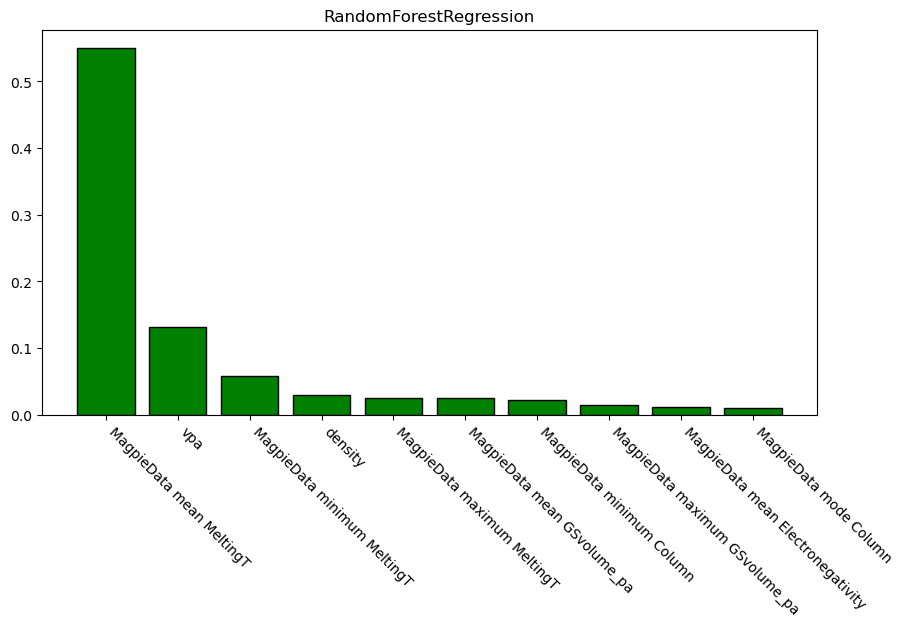

In [31]:
importances_RFR = RFR.feature_importances_
RFR_Sort = np.argsort(importances_RFR)[::-1]
plt.figure(figsize = (10,5))
plt.title('RandomForestRegression')
plt.bar(x = Feat_Name[RFR_Sort][0:10], height = importances_RFR[RFR_Sort][0:10], color = 'g', edgecolor = 'k')
plt.xticks(rotation = -45, fontsize = 10, ha = 'left')
plt.yticks(fontsize = 10)
plt.show()